# 04. Self Oil Station price Analysis

## 1. 셀레니움 설치
- 윈도우, mac
- conda install selenium

In [2]:
!pip install selenium

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 10.7 MB/s eta 0:00:01
   ----- ---------------------------------- 1.3/9.5 MB 12.1 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/9.5 MB 13.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.5 MB 12.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.5 MB 12.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.5 MB 7.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.5 MB 8.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.5 MB 8.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.5 MB 9.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.4/9.5 MB 9.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.1/9.5 MB 9.5 MB/s eta 0:00:01
   ----------------------- ---------------- 5.7/9.5 MB 10.1 MB/s eta 0:00:01
   ----------

In [34]:
!pip list  grep sele

Package                   Version
------------------------- ------------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    4.1.0
Bottleneck                1.3.7
branca                    0.7.1
Brotli                    1.0.9
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        2.0.4
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.0.5
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile                1.1.0
exceptiongroup            1.2.0
executing                 0.8.3
fake-useragent            1.5.1
fastjsonschema            2.16.2
folium              

In [35]:
!pip install webdriver-manager

In [40]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [41]:
driver.get('https://www.naver.com')

In [44]:
driver.quit()

In [48]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get('https://www.naver.com')

In [49]:
driver.quit()

## 2. 셀프 주유소 정말 저렴한가? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인 
- 목표 데이터 
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [1]:
from selenium import webdriver

In [2]:
#페이지 접근
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)

In [ ]:
#만약 팝업창이 뜨면 닫아주기
driver.switch_to_window(driver.window_handels[-1]) #팝업창으로 탭 전환 후 
driver.close() #닫아주기

In [4]:
# 지역 : 시/도
from selenium.webdriver.common.by import By

sido_list_raw=driver.find_element(By.ID,'SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [9]:
sido_list= sido_list_raw.find_elements(By.TAG_NAME,'option')
sido_list[1].text

'서울'

In [10]:
sido_list[1].get_attribute('value')

'서울특별시'

In [14]:
sido_names=[]

for option in sido_list:
    sido_names.append(option.get_attribute('value'))

sido_names.remove('')
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [15]:
len(sido_names)

17

In [23]:
sido_list_raw.send_keys(sido_names[0])

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=124.0.6367.119); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF75B701502+60802]
	(No symbol) [0x00007FF75B67AC02]
	(No symbol) [0x00007FF75B537CE4]
	(No symbol) [0x00007FF75B54A051]
	(No symbol) [0x00007FF75B54AA7A]
	(No symbol) [0x00007FF75B53E95B]
	(No symbol) [0x00007FF75B53C781]
	(No symbol) [0x00007FF75B5401DB]
	(No symbol) [0x00007FF75B540280]
	(No symbol) [0x00007FF75B587A4C]
	(No symbol) [0x00007FF75B587B32]
	(No symbol) [0x00007FF75B57DDFB]
	(No symbol) [0x00007FF75B5AAB7A]
	(No symbol) [0x00007FF75B57A7C6]
	(No symbol) [0x00007FF75B5AAD90]
	(No symbol) [0x00007FF75B5CA224]
	(No symbol) [0x00007FF75B5AA923]
	(No symbol) [0x00007FF75B578FEC]
	(No symbol) [0x00007FF75B579C21]
	GetHandleVerifier [0x00007FF75BA0411D+3217821]
	GetHandleVerifier [0x00007FF75BA460B7+3488055]
	GetHandleVerifier [0x00007FF75BA3F03F+3459263]
	GetHandleVerifier [0x00007FF75B7BB846+823494]
	(No symbol) [0x00007FF75B685F9F]
	(No symbol) [0x00007FF75B680EC4]
	(No symbol) [0x00007FF75B681052]
	(No symbol) [0x00007FF75B6718A4]
	BaseThreadInitThunk [0x00007FFCD769257D+29]
	RtlUserThreadStart [0x00007FFCD7D6AA48+40]


In [24]:
sido_list_raw.send_keys(sido_names[0])

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=124.0.6367.119); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF75B701502+60802]
	(No symbol) [0x00007FF75B67AC02]
	(No symbol) [0x00007FF75B537CE4]
	(No symbol) [0x00007FF75B54A051]
	(No symbol) [0x00007FF75B54AA7A]
	(No symbol) [0x00007FF75B53E95B]
	(No symbol) [0x00007FF75B53C781]
	(No symbol) [0x00007FF75B5401DB]
	(No symbol) [0x00007FF75B540280]
	(No symbol) [0x00007FF75B587A4C]
	(No symbol) [0x00007FF75B587B32]
	(No symbol) [0x00007FF75B57DDFB]
	(No symbol) [0x00007FF75B5AAB7A]
	(No symbol) [0x00007FF75B57A7C6]
	(No symbol) [0x00007FF75B5AAD90]
	(No symbol) [0x00007FF75B5CA224]
	(No symbol) [0x00007FF75B5AA923]
	(No symbol) [0x00007FF75B578FEC]
	(No symbol) [0x00007FF75B579C21]
	GetHandleVerifier [0x00007FF75BA0411D+3217821]
	GetHandleVerifier [0x00007FF75BA460B7+3488055]
	GetHandleVerifier [0x00007FF75BA3F03F+3459263]
	GetHandleVerifier [0x00007FF75B7BB846+823494]
	(No symbol) [0x00007FF75B685F9F]
	(No symbol) [0x00007FF75B680EC4]
	(No symbol) [0x00007FF75B681052]
	(No symbol) [0x00007FF75B6718A4]
	BaseThreadInitThunk [0x00007FFCD769257D+29]
	RtlUserThreadStart [0x00007FFCD7D6AA48+40]


In [20]:
# 구 

gu_list_raw = driver.find_element(By.ID,'SIGUNGU_NM0')
gu_list = gu_list_raw.find_elements(By.TAG_NAME,'option')
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['경산시',
 '경주시',
 '고령군',
 '구미시',
 '김천시',
 '문경시',
 '봉화군',
 '상주시',
 '성주군',
 '안동시',
 '영덕군',
 '영양군',
 '영주시',
 '영천시',
 '예천군',
 '울릉군',
 '울진군',
 '의성군',
 '청도군',
 '청송군',
 '칠곡군',
 '포항시',
 '포항시남구',
 '포항시북구']

In [26]:
sido_list_raw.send_keys(sido_names[0])

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=124.0.6367.119); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF75B701502+60802]
	(No symbol) [0x00007FF75B67AC02]
	(No symbol) [0x00007FF75B537CE4]
	(No symbol) [0x00007FF75B54A051]
	(No symbol) [0x00007FF75B54AA7A]
	(No symbol) [0x00007FF75B53E95B]
	(No symbol) [0x00007FF75B53C781]
	(No symbol) [0x00007FF75B5401DB]
	(No symbol) [0x00007FF75B540280]
	(No symbol) [0x00007FF75B587A4C]
	(No symbol) [0x00007FF75B587B32]
	(No symbol) [0x00007FF75B57DDFB]
	(No symbol) [0x00007FF75B5AAB7A]
	(No symbol) [0x00007FF75B57A7C6]
	(No symbol) [0x00007FF75B5AAD90]
	(No symbol) [0x00007FF75B5CA224]
	(No symbol) [0x00007FF75B5AA923]
	(No symbol) [0x00007FF75B578FEC]
	(No symbol) [0x00007FF75B579C21]
	GetHandleVerifier [0x00007FF75BA0411D+3217821]
	GetHandleVerifier [0x00007FF75BA460B7+3488055]
	GetHandleVerifier [0x00007FF75BA3F03F+3459263]
	GetHandleVerifier [0x00007FF75B7BB846+823494]
	(No symbol) [0x00007FF75B685F9F]
	(No symbol) [0x00007FF75B680EC4]
	(No symbol) [0x00007FF75B681052]
	(No symbol) [0x00007FF75B6718A4]
	BaseThreadInitThunk [0x00007FFCD769257D+29]
	RtlUserThreadStart [0x00007FFCD7D6AA48+40]


In [28]:
driver.quit()

In [30]:
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)

In [31]:
sido_list_raw.send_keys(sido_names[0])

MaxRetryError: HTTPConnectionPool(host='localhost', port=59699): Max retries exceeded with url: /session/36e78e58056267fd9fc9767dc3e8a575/element/f.FB85005FE0D1AA783E6CC53859C41ECD.d.FAC6068E46AD3AA2448F4468F4E0538B.e.6/value (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E9916F9100>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

In [32]:
gu_list_raw = driver.find_element(By.ID,'SIGUNGU_NM0')
gu_list = gu_list_raw.find_elements(By.TAG_NAME,'option')
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [34]:
gu_names[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [35]:
sido_names[:5]

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시']

In [36]:
# 엑셀 저장

driver.find_element(By.CLASS_NAME,'btn_type6_ex_save').click()

In [37]:
import time 
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID,'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    driver.find_element(By.CLASS_NAME,'btn_type6_ex_save').click()
    time.sleep(3)
    

C:\Users\user\AppData\Local\Temp\ipykernel_11864\2209608291.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [38]:
driver.close()

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=124.0.6367.119)
Stacktrace:
	GetHandleVerifier [0x00007FF75B701502+60802]
	(No symbol) [0x00007FF75B67AC02]
	(No symbol) [0x00007FF75B537CE4]
	(No symbol) [0x00007FF75B51E894]
	(No symbol) [0x00007FF75B51F3FF]
	(No symbol) [0x00007FF75B5382DD]
	(No symbol) [0x00007FF75B50DACC]
	(No symbol) [0x00007FF75B5B9E47]
	(No symbol) [0x00007FF75B5B984B]
	(No symbol) [0x00007FF75B5AAB40]
	(No symbol) [0x00007FF75B578FEC]
	(No symbol) [0x00007FF75B579C21]
	GetHandleVerifier [0x00007FF75BA0411D+3217821]
	GetHandleVerifier [0x00007FF75BA460B7+3488055]
	GetHandleVerifier [0x00007FF75BA3F03F+3459263]
	GetHandleVerifier [0x00007FF75B7BB846+823494]
	(No symbol) [0x00007FF75B685F9F]
	(No symbol) [0x00007FF75B680EC4]
	(No symbol) [0x00007FF75B681052]
	(No symbol) [0x00007FF75B6718A4]
	BaseThreadInitThunk [0x00007FFCD769257D+29]
	RtlUserThreadStart [0x00007FFCD7D6AA48+40]


## 4. 데이터 정리하기

In [43]:
import pandas as pd
from glob import glob

In [40]:
# 파일 목록 한번에 가져오기

glob('../data/지역_*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [42]:
station_files = glob('../data/지역_*.xls')
station_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [45]:
# 하나만 읽어보기

tmp = pd.read_excel(station_files[0],header=2)
tmp.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
9,서울특별시,(주)소모 성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1798,1698,-
10,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,2059,1889,1759,-
11,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),HD현대오일뱅크,02-484-9323,N,-,1943,1792,-
12,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1968,1858,-
13,서울특별시,명일주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,Y,-,-,-,-


In [46]:
tmp_raw=[]

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [47]:
tmp_raw

[       지역                    상호                            주소        상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  HD현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  HD현대오일뱅크   
 2   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)     SK에너지   
 3   서울특별시           (주)소모 신월주유소        서울 강동구 양재대로 1323 (성내동)     GS칼텍스   
 4   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)     SK에너지   
 5   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168     GS칼텍스   
 6   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)     GS칼텍스   
 7   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)     S-OIL   
 8   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)     SK에너지   
 9   서울특별시           (주)소모 성내주유소         서울 강동구 올림픽로 578 (성내동)     GS칼텍스   
 10  서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)     GS칼텍스   
 11  서울특별시               천호현대주유소           서울 강동구 천중로 67 (천호동)  HD현대오일뱅크   
 12  서울특별시  

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [48]:
station_raw = pd.concat(tmp_raw)

In [49]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1709,1572,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1714,1585,-
2,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1725,1575,1500
3,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1936,1756,1648,-
4,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,1989,1759,1649,1600
...,...,...,...,...,...,...,...,...,...,...
27,서울특별시,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,GS칼텍스,02-565-0267,N,2475,2285,2116,1650
28,서울특별시,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,HD현대오일뱅크,02-543-1154,N,2487,2288,2088,-
29,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2533,2326,2176,1798
30,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,HD현대오일뱅크,02-518-5631,N,2828,2584,2424,-


In [50]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      434 non-null    object
 1   상호      434 non-null    object
 2   주소      434 non-null    object
 3   상표      434 non-null    object
 4   전화번호    434 non-null    object
 5   셀프여부    434 non-null    object
 6   고급휘발유   434 non-null    object
 7   휘발유     434 non-null    object
 8   경유      434 non-null    object
 9   실내등유    434 non-null    object
dtypes: object(10)
memory usage: 37.3+ KB


In [74]:
stations = pd.DataFrame({
    '상호' : station_raw['상호'], 
    '주소' : station_raw['주소'],
    '가격' : station_raw['휘발유'],
    '셀프' : station_raw['셀프여부'],
    '상표' : station_raw['상표']
})

stations.tail() 

,상호,주소,가격,셀프,상표
27,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2285,N,GS칼텍스
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2288,N,HD현대오일뱅크
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2326,N,SK에너지
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584,N,HD현대오일뱅크
31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [75]:
for each_address in stations['주소']:
    print(each_address.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용

In [76]:
stations['구'] = [each_address.split()[1] for each_address in stations['주소']]

In [77]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1709,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1714,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1725,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1756,Y,GS칼텍스,강동구
4,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1759,Y,SK에너지,강동구
...,...,...,...,...,...,...
27,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2285,N,GS칼텍스,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2288,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2326,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584,N,HD현대오일뱅크,강남구


In [78]:
stations['구'].unique(), len(stations['구'].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [79]:
#만약 '구'컬럼에 이상한 데이터가 있으면 바꿔줘야 함
stations[stations['구'] == '서울특별시']
stations.loc[stations['구'] == '서울특별시','구'] = '성동구' 

In [80]:
# 가격데이터를 연산해주기 위해 데이터형 변환

stations['가격'] = stations['가격'].astype('float')

ValueError: could not convert string to float: '-'

In [81]:
# 가격정보 없는 주유소
stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구
13,명일주유소,서울 강동구 고덕로 168 (명일동),-,Y,SK에너지,강동구
17,대성산업㈜청량리주유소,서울 동대문구 왕산로 289 (청량리동),-,Y,GS칼텍스,동대문구
11,용강주유소,서울 마포구 토정로 258,-,N,S-OIL,마포구
11,강평주유소 ㈜강평텔레콤,서울 광진구 아차산로 616,-,N,SK에너지,광진구


In [82]:
# 가격 정보가 있는 주유소만 사용

stations = stations[stations['가격'] != '-']
stations.tail()

,상호,주소,가격,셀프,상표,구
27,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2285,N,GS칼텍스,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2288,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2326,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584,N,HD현대오일뱅크,강남구
31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [83]:
stations['가격']= stations['가격'].astype('float')

C:\Users\user\AppData\Local\Temp\ipykernel_11864\3399534937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격']= stations['가격'].astype('float')


In [84]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      430 non-null    object 
 1   주소      430 non-null    object 
 2   가격      430 non-null    float64
 3   셀프      430 non-null    object 
 4   상표      430 non-null    object 
 5   구       430 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.5+ KB


In [85]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1709.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1714.0,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1725.0,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1756.0,Y,GS칼텍스,강동구
4,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1759.0,Y,SK에너지,강동구
...,...,...,...,...,...,...
27,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2285.0,N,GS칼텍스,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2288.0,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2326.0,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584.0,N,HD현대오일뱅크,강남구


In [86]:
# 인덱스 재정렬

stations.reset_index(inplace=True)
stations

,index,상호,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1709.0,Y,HD현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1714.0,N,HD현대오일뱅크,강동구
2,2,방아다리주유소,서울 강동구 동남로 811 (명일동),1725.0,Y,SK에너지,강동구
3,3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1756.0,Y,GS칼텍스,강동구
4,4,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1759.0,Y,SK에너지,강동구
...,...,...,...,...,...,...,...
425,27,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2285.0,N,GS칼텍스,강남구
426,28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2288.0,N,HD현대오일뱅크,강남구
427,29,SK논현주유소,서울 강남구 논현로 747 (논현동),2326.0,N,SK에너지,강남구
428,30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584.0,N,HD현대오일뱅크,강남구


In [87]:
del stations['index']
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1709.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1714.0,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1725.0,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1756.0,Y,GS칼텍스,강동구
4,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1759.0,Y,SK에너지,강동구
...,...,...,...,...,...,...
425,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2285.0,N,GS칼텍스,강남구
426,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2288.0,N,HD현대오일뱅크,강남구
427,SK논현주유소,서울 강남구 논현로 747 (논현동),2326.0,N,SK에너지,강남구
428,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584.0,N,HD현대오일뱅크,강남구


In [88]:
stations.to_csv('../data/04. Oli_stationList_seoul_mijin.csv', encoding = 'utf-8-sig',sep=',')

## 5. 주유가격 정보 시각화

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib','inline')



f_path = 'C:\Windows\Fonts\malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=f_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown')

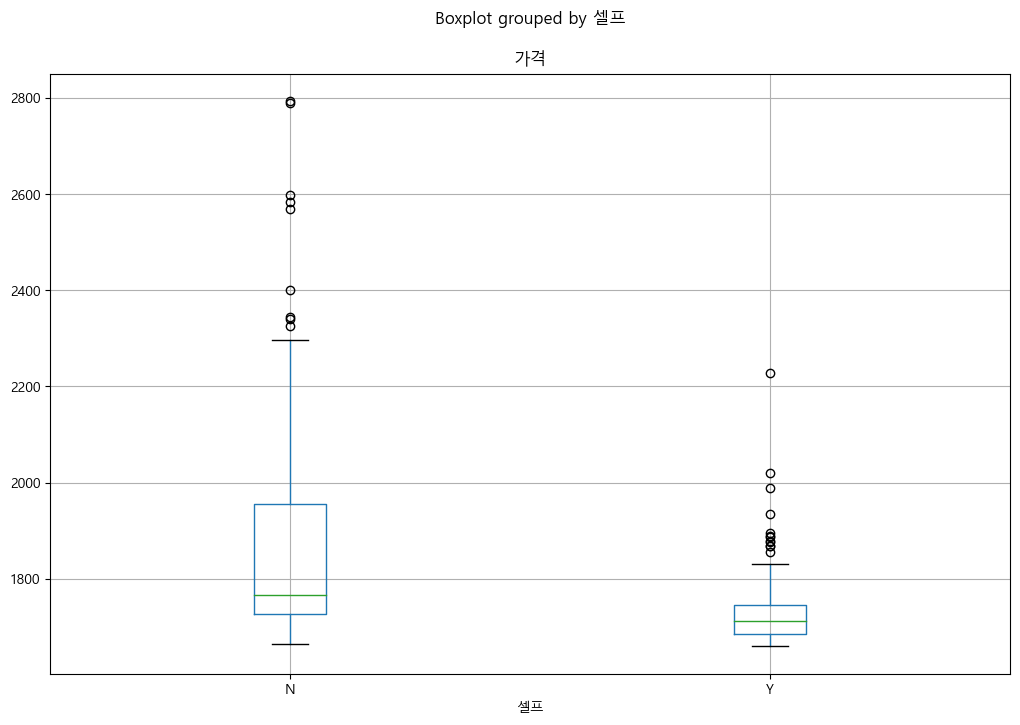

In [102]:
#boxplot(pandas)
stations.boxplot(column='가격',by='셀프',figsize=(12,8));

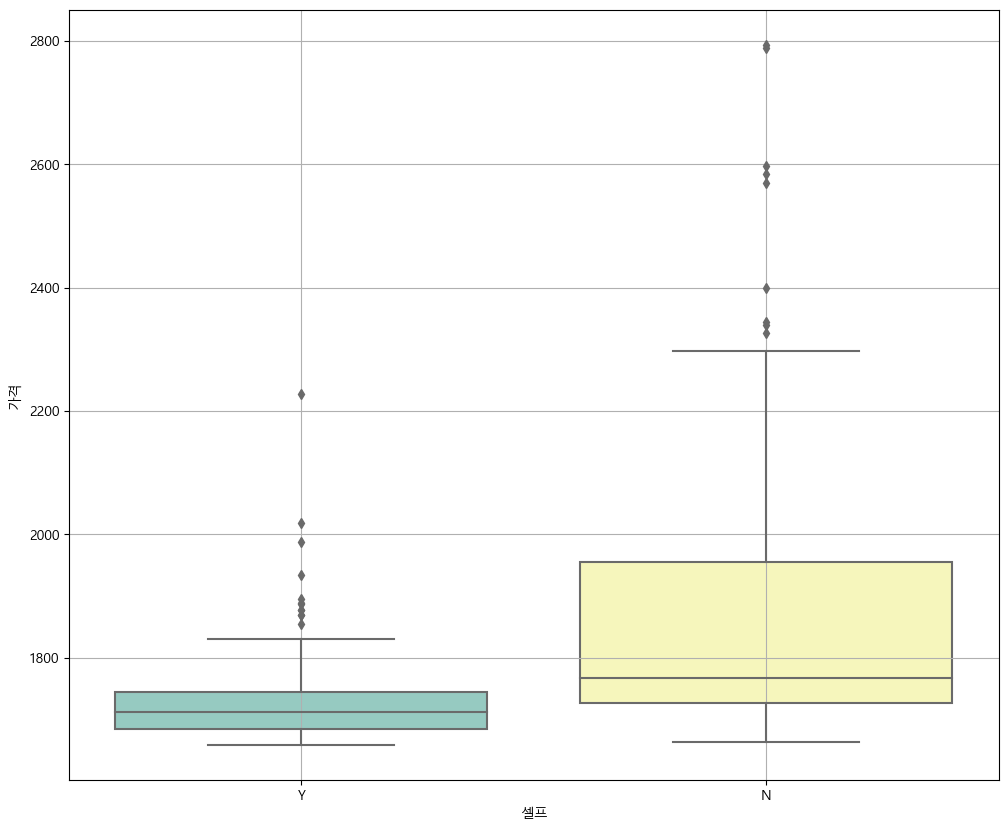

In [105]:
# boxplot(seaborn)

plt.figure(figsize=(12,10))
sns.boxplot(x='셀프',y='가격', data=stations, palette='Set3')
plt.grid(True)
plt.show()

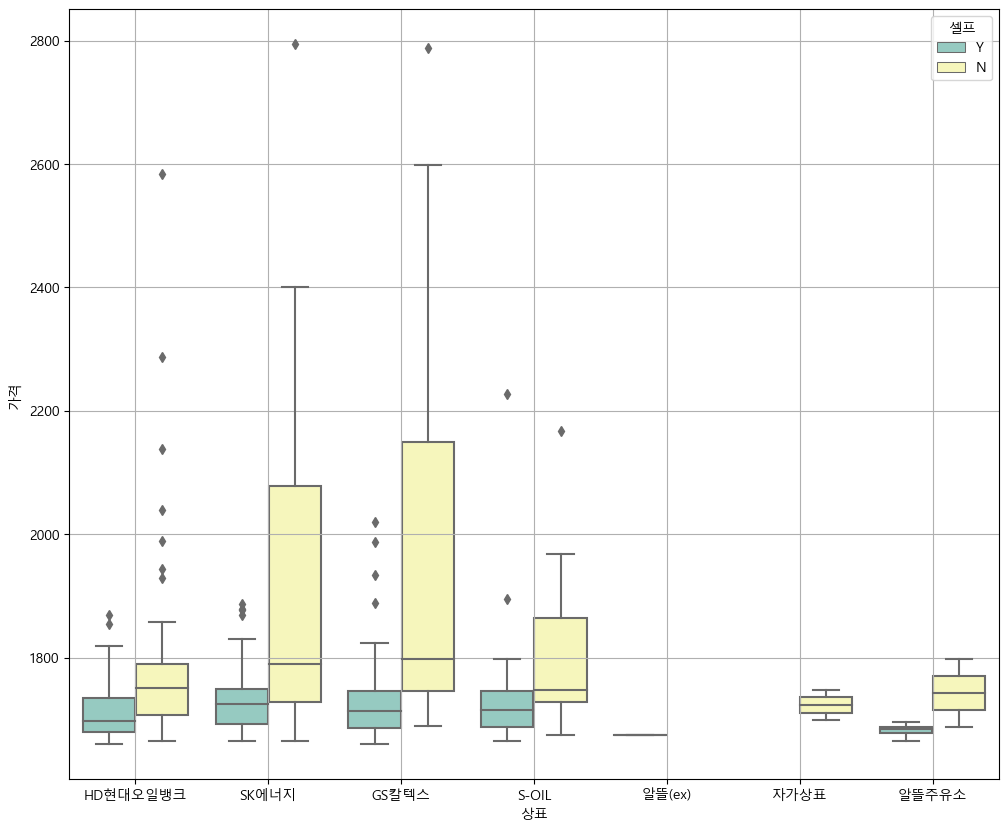

In [106]:

plt.figure(figsize=(12,10))
sns.boxplot(x='상표',y='가격',hue='셀프', data=stations, palette='Set3')
plt.grid(True)
plt.show()

In [108]:
# 지도 시각화 
import json
import folium
import warnings #경고문구 없애는 모듈
warnings.simplefilter(action='ignore', category=FutureWarning)

In [110]:
# 가장 비싼 주유소 10개 
stations.sort_values(by='가격', ascending=False)

,상호,주소,가격,셀프,상표,구
269,서남주유소,서울 중구 통일로 30,2794.0,N,SK에너지,중구
235,서계주유소,서울 용산구 청파로 367 (청파동),2789.0,N,GS칼텍스,용산구
429,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
428,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584.0,N,HD현대오일뱅크,강남구
268,필동주유소,서울 중구 퇴계로 196 (필동2가),2569.0,N,GS칼텍스,중구
...,...,...,...,...,...,...
51,지에스칼텍스(주)홍제동주유소,서울 서대문구 통일로 372,1664.0,Y,GS칼텍스,서대문구
236,불광주유소,서울 은평구 연서로 314 (불광동),1663.0,Y,HD현대오일뱅크,은평구
114,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1660.0,Y,GS칼텍스,성북구
112,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1659.0,Y,HD현대오일뱅크,성북구


In [111]:
# 가장 덜비싼 주유소 10개 
stations.sort_values(by='가격', ascending=True)

,상호,주소,가격,셀프,상표,구
113,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1659.0,Y,GS칼텍스,성북구
112,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1659.0,Y,HD현대오일뱅크,성북구
114,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1660.0,Y,GS칼텍스,성북구
236,불광주유소,서울 은평구 연서로 314 (불광동),1663.0,Y,HD현대오일뱅크,은평구
342,㈜자연에너지 고척주유소,서울 구로구 고척로 199 (고척동),1664.0,Y,HD현대오일뱅크,구로구
...,...,...,...,...,...,...
268,필동주유소,서울 중구 퇴계로 196 (필동2가),2569.0,N,GS칼텍스,중구
428,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2584.0,N,HD현대오일뱅크,강남구
429,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
235,서계주유소,서울 용산구 청파로 367 (청파동),2789.0,N,GS칼텍스,용산구


In [112]:
import numpy as np
gu_data=pd.pivot_table(stations, index='구',values='가격',aggfunc=np.mean)
gu_data

,가격
구,
강남구,1975.812500
강동구,1796.000000
강북구,1684.636364
강서구,1742.562500
관악구,1759.642857
광진구,1712.000000
구로구,1741.888889
금천구,1730.818182
노원구,1729.285714


In [124]:
geo_path='../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path,encoding='utf-8-sig'))

my_map=folium.Map(location=[37.5502,126.982], zoom_start=10.5)
folium.Choropleth(
    geo_data=geo_str,
    data = gu_data,
    columns=[gu_data.index,'가격'],
    key_on='feature.id',
    fill_color='PuRd',
    legend_name='휘발유 가격'
).add_to(my_map)
my_map
    